In [32]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("figures/project_style.mplstyle")

Text(0, 0.5, 'Count')

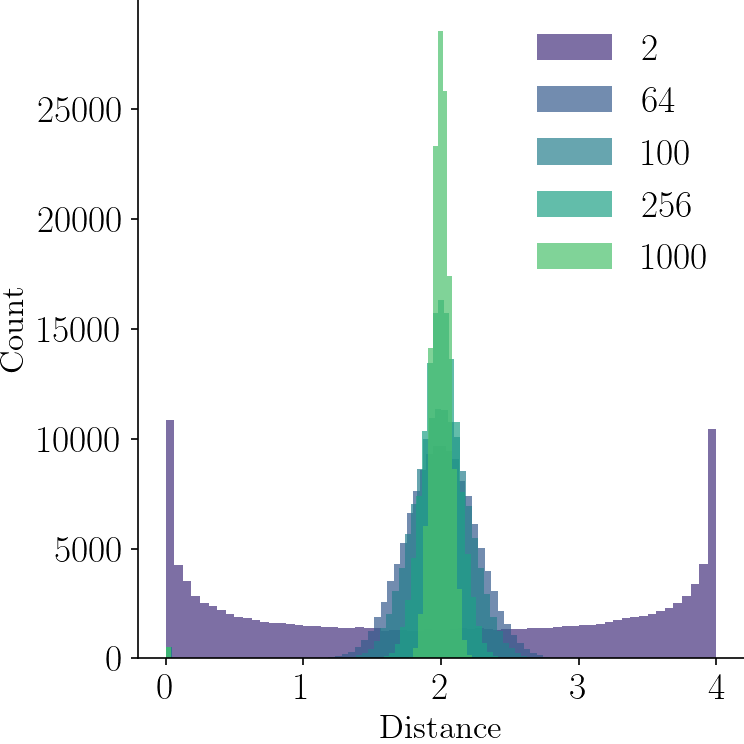

In [35]:
n_vec = 512
inds = np.triu_indices(n_vec)

dims = [2, 64, 100, 256, 1000]
plt.figure(figsize=(5,5))


for n in dims:
    x_hat = np.random.normal(0, 1, (n_vec, n))
    x = x_hat/np.linalg.norm(x_hat, axis = -1, keepdims = True)
    d = np.linalg.norm(x[None]- x[:,None],axis=-1)**2
    plt.hist(d[inds[0], inds[1]], label = n, alpha = 0.7, bins = 64)

plt.legend(frameon = False)
plt.xlabel("Distance")
plt.ylabel("Count")